# Определение языка и VK API

В данном задании вам нужно будет:

* используя API Вконтакте, скачать комментарии к первым ста постам из пяти сообществ
* натренировать модель распознавания языков на статьях из Википедии.
* распознать язык всех комментариев, где в тексте есть 10 и более символов, и построить статистику

## VK API

Для подключения к ВКонтакте мы будем использовать VK API. Здесь есть документация к этой библиотеке https://vk-api.readthedocs.io/en/latest/

In [ ]:
#!pip(3) install vk_api

In [1]:
import vk_api

# здесь нужно ввести данные своего аккаунта
# когда будете сдавать, не забудьте убрать эти две строчки из ноутбука
import urllib.request  # импортируем модуль

import nltk

user = '+79153603583' # вставьте сюда свой номер телефона
password = 'Angry1999Bob' # вставьте сюда свой пароль

# авторизация
vk_session = vk_api.VkApi(login=user, password=password)
vk_session.auth()

vk = vk_session.get_api() # объект с API

Получить записи со страницы можно с помощью метода `wall.get`. Он принимает параметр `domain` — короткое имя пользователя или сообщества — и `count` — количество записей, которое вы хотите получить (максимум — 100). По Список методов для работы со стенами: https://vk.com/dev/wall

Например, вот так можно получить последние две записи с вот этой страницы https://vk.com/futureisnow. Выдача представляет собой словарь, в котором в поле `items` записан список словарей, содержащий информацию о каждой из записи. 

In [2]:
#vk.wall.get(domain="futureisnow", count=2)

С помощью метода `groups.getById` можно получить информацию о сообществе, в том числе его id.

In [3]:
#vk.groups.getById(group_ids="futureisnow")

Скачайте информацию о последних ста записях в следующих пабликах: https://vk.com/futureisnow, https://vk.com/eternalclassic, https://vk.com/ukrlit_memes, https://vk.com/ukrainer_net, https://vk.com/amanzohel, https://vk.com/barg_kurumk_culture

In [4]:
# список domain'ов, чтобы вам не копировать их самими :)
publics = ["futureisnow",
           "eternalclassic",
           "ukrlit_memes",
           "ukrainer_net",
           "amanzohel",
           "barg_kurumk_culture"]

In [5]:
items = {} # ключи — это паблики

req = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=-111587102&offset=18&count=100&v=5.92&access_token=123efdd0123efdd0123efdd0501253dba91123e123efdd04faf4d10a55ed9523f1ef669') 
req2 = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=-129440544&offset=18&count=100&v=5.92&access_token=123efdd0123efdd0123efdd0501253dba91123e123efdd04faf4d10a55ed9523f1ef669') 
req3 = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=-131348832&offset=18&count=100&v=5.92&access_token=123efdd0123efdd0123efdd0501253dba91123e123efdd04faf4d10a55ed9523f1ef669') 
req4 = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=-5164516&offset=18&count=100&v=5.92&access_token=123efdd0123efdd0123efdd0501253dba91123e123efdd04faf4d10a55ed9523f1ef669') 
req5 = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=-66347916&offset=18&count=100&v=5.92&access_token=123efdd0123efdd0123efdd0501253dba91123e123efdd04faf4d10a55ed9523f1ef669') 
req6 = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=-95189895&offset=18&count=100&v=5.92&access_token=123efdd0123efdd0123efdd0501253dba91123e123efdd04faf4d10a55ed9523f1ef669') 

response = urllib.request.urlopen(req) 
result = response.read().decode('utf-8')

response2 = urllib.request.urlopen(req2) 
result2 = response2.read().decode('utf-8')

response3 = urllib.request.urlopen(req3) 
result3 = response3.read().decode('utf-8')

response4 = urllib.request.urlopen(req4) 
result4 = response4.read().decode('utf-8')

response5 = urllib.request.urlopen(req5) 
result5 = response5.read().decode('utf-8')

response6 = urllib.request.urlopen(req6) 
result6 = response6.read().decode('utf-8')

# ваш код


In [6]:
print(result)

{"response":{"count":8221,"items":[{"id":250670,"from_id":-111587102,"owner_id":-111587102,"date":1569771900,"marked_as_ads":0,"post_type":"post","text":"Москва, Политех","signer_id":255452592,"attachments":[{"type":"photo","photo":{"id":457288589,"album_id":-7,"owner_id":-111587102,"user_id":100,"sizes":[{"type":"m","url":"https:\/\/sun1-94.userapi.com\/c853628\/v853628324\/10a664\/NrqLFgt7UpI.jpg","width":97,"height":130},{"type":"o","url":"https:\/\/sun1-27.userapi.com\/c853628\/v853628324\/10a668\/aWDUJlYyXv0.jpg","width":130,"height":173},{"type":"p","url":"https:\/\/sun1-94.userapi.com\/c853628\/v853628324\/10a669\/RYEULQ97Zvs.jpg","width":200,"height":267},{"type":"q","url":"https:\/\/sun1-14.userapi.com\/c853628\/v853628324\/10a66a\/WhepB47kEXA.jpg","width":320,"height":427},{"type":"r","url":"https:\/\/sun1-90.userapi.com\/c853628\/v853628324\/10a66b\/mNsNHseQ6ac.jpg","width":510,"height":680},{"type":"s","url":"https:\/\/sun1-86.userapi.com\/c853628\/v853628324\/10a663\/1pXl6

In [7]:
import json
data = json.loads(result) 
data2 = json.loads(result2) 
data3 = json.loads(result3) 
data4 = json.loads(result4) 
data5 = json.loads(result5) 
data6 = json.loads(result6) 
#print(type(data))

In [8]:
data['response']['items']

[{'id': 250670,
  'from_id': -111587102,
  'owner_id': -111587102,
  'date': 1569771900,
  'marked_as_ads': 0,
  'post_type': 'post',
  'text': 'Москва, Политех',
  'signer_id': 255452592,
  'attachments': [{'type': 'photo',
    'photo': {'id': 457288589,
     'album_id': -7,
     'owner_id': -111587102,
     'user_id': 100,
     'sizes': [{'type': 'm',
       'url': 'https://sun1-94.userapi.com/c853628/v853628324/10a664/NrqLFgt7UpI.jpg',
       'width': 97,
       'height': 130},
      {'type': 'o',
       'url': 'https://sun1-27.userapi.com/c853628/v853628324/10a668/aWDUJlYyXv0.jpg',
       'width': 130,
       'height': 173},
      {'type': 'p',
       'url': 'https://sun1-94.userapi.com/c853628/v853628324/10a669/RYEULQ97Zvs.jpg',
       'width': 200,
       'height': 267},
      {'type': 'q',
       'url': 'https://sun1-14.userapi.com/c853628/v853628324/10a66a/WhepB47kEXA.jpg',
       'width': 320,
       'height': 427},
      {'type': 'r',
       'url': 'https://sun1-90.userapi.co

In [9]:
f1 = []
import re
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
i = 0
for word in RE_EMOJI.sub('',str(data['response']['items'][i]['text']).replace('\n','').replace('!','').replace(',','').replace('?','').replace('.','').replace('"','').replace(':','').replace(';','').replace('[','').replace(']','')):
    if str(data['response']['items'][i]['text']) != '':
        try:
            items['futureisnow%s' % (i)] = data['response']['items'][i]['text']
            f1.append(data['response']['items'][i]['id'])
        except IndexError:
            pass
    i += 1
    if i == 100:
        break

In [10]:
f2 = []
i = 0
for word in RE_EMOJI.sub('',str(data2['response']['items'][i]['text']).replace('!','').replace(',','').replace('?','').replace('.','').replace('\n','').replace('"','').replace(':','').replace(';','').replace('[','').replace(']','')):
    #text3 = str(data['response']['items'][i]['text'])
    if str(data2['response']['items'][i]['text']) != '':
        items['eternalclassic %s' % (i)] = data2['response']['items'][i]['text']
        f2.append(data2['response']['items'][i]['id'])
    i += 1
    if i == 100:
        break

In [11]:
#print(f2)

#print(items)

In [12]:
f3 = []
i = 0
    
for word in RE_EMOJI.sub('',str(data3['response']['items'][i]['text']).replace('!','').replace(',','').replace('?','').replace('.','').replace('"','').replace('\n','').replace(':','').replace(';','').replace('[','').replace(']','')):
    #text3 = str(data['response']['items'][i]['text'])
    if str(data3['response']['items'][i]['text']) != '':
        items['ukrlit_memes %s' % (i)] = data3['response']['items'][i]['text']
        f3.append(data3['response']['items'][i]['id'])
    i += 1
    if i == 100:
        break

In [13]:
#print(f3)
#print(items)

In [14]:
f4 = []
i = 0
    
for word in RE_EMOJI.sub('',str(data4['response']['items'][i]['text']).replace('!','').replace('\n','').replace(',','').replace('?','').replace('.','').replace('"','').replace(':','').replace(';','').replace('[','').replace(']','')):
    #text3 = str(data['response']['items'][i]['text'])
    if str(data4['response']['items'][i]['text']) != '':
        items['ukrainer_net %s' % (i)] = data4['response']['items'][i]['text']
        f4.append(data4['response']['items'][i]['id'])
    i += 1
    if i == 100:
        break
#items

In [15]:
#print(f4)
#print()
#print(items)

In [16]:
f5 = []
i = 0
    
for word in RE_EMOJI.sub('',str(data5['response']['items'][i]['text']).replace('!','').replace(',','').replace('?','').replace('.','').replace('"','').replace(':','').replace(';','').replace('[','').replace('\n','').replace(']','')):
    #text3 = str(data['response']['items'][i]['text'])
    if str(data5['response']['items'][i]['text']) != '':
        items['amanzohel %s' % (i)] = data5['response']['items'][i]['text']
        f5.append(data5['response']['items'][i]['id'])
    i += 1
    if i == 100:
        break
#items

In [17]:
#print(f5)
#print()
#print(items)

In [18]:
f6 = []
i = 0
    
for word in RE_EMOJI.sub('',str(data6['response']['items'][i]['text']).replace('!','').replace(',','').replace('?','').replace('.','').replace('"','').replace(':','').replace(';','').replace('[','').replace(']','').replace('\n','')):
    #text3 = str(data['response']['items'][i]['text'])
    if str(data6['response']['items'][i]['text']) != '':
        items['barg_kurumk_culture %s' % (i)] = data6['response']['items'][i]['text']
        f6.append(data6['response']['items'][i]['id'])
    i += 1
    if i == 100:
        break

print(items)

print(f6)

{'futureisnow0': 'Москва, Политех', 'futureisnow5': 'прячешься от Face ID?\nвот к той стерве и иди', 'eternalclassic 0': '\u2003 \u2003 \u2003 \u2003 \u2003 \u2003', 'eternalclassic 1': "\\\\This fucking sucks.  As a old person let me give you advice that has been demonstrated repeatedly throughout vastness of my years:\n\nNothing will work out.  If you think the stars are aligning for you?  Think again buddy, somehow it will all fall apart.  You think that things are finally going to get better in your life?  HA! fooled again!  That's it I've had it, the harder you try to make something in your life workout, the greater the shitshow you will be in for.", 'eternalclassic 4': '\u2003 \u2003 \u2003 \u2003 \u2003 \u2003', 'eternalclassic 5': '\u2003 \u2003 \u2003 \u2003 \u2003 \u2003', 'eternalclassic 7': '\u2003 \u2003 \u2003 \u2003 \u2003 \u2003', 'eternalclassic 8': '\u2003 \u2003 \u2003 \u2003 \u2003 \u2003', 'eternalclassic 9': '\u2003 \u2003 \u2003 \u2003 \u2003 \u2003', 'eternalcla

Найдите в документации (https://vk.com/dev/wall) метод для получения комментариев и получите первые сто комментариев каждого поста из выборки для каждого паблика.

In [19]:
corpora = {}

In [20]:
corrp = []

In [21]:
i = 0
for word in f1:
    #corpora["futureisnow %s" % (i)] = vk.wall.getComments(owner_id = -111587102, count=100, post_id = word)
    com = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=-111587102&post_id=%s&count=100&v=5.92&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8' % (word))
    response = urllib.request.urlopen(com) 
    result = response.read().decode('utf-8')
    #import json
    data = json.loads(result)
    #if len(data['response']['items'][i]['text']) >= 10:
    try:
        if len(RE_EMOJI.sub('',str(data['response']['items'][i]['text']))) > 10:
            corpora["futureisnow %s" % (i)] = RE_EMOJI.sub('',str(data['response']['items'][i]['text']))
            corrp.append(RE_EMOJI.sub('',str(data['response']['items'][i]['text'])))
    except IndexError:
        pass
    i+=1
    if i > 100:
        break

#corpora

In [22]:
i = 0
for word in f2:
    #corpora["futureisnow %s" % (i)] = vk.wall.getComments(owner_id = -111587102, count=100, post_id = word)
    com2 = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=-129440544&post_id=%s&count=100&v=5.92&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8' % (word))
    response2 = urllib.request.urlopen(com2) 
    result2 = response2.read().decode('utf-8')
    #import json
    data2 = json.loads(result2)
    #if len(data['response']['items'][i]['text']) >= 10:
    try:
        if len(RE_EMOJI.sub('',str(data2['response']['items'][i]['text']))) > 10:
            corpora["eternalclassic %s" % (i)] = RE_EMOJI.sub('',str(data2['response']['items'][i]['text']))
            corrp.append(RE_EMOJI.sub('',str(data2['response']['items'][i]['text'])))
    except IndexError:
        pass
    #print(data['response']['items'][i]['text'])
    i+=1
    if i > 100:
        break

In [23]:
corrp
#-129440544
#-131348832
#-5164516
#-66347916
#-95189895

['У уборщицы и охраника лайтрейв тупа',
 'Прячешься от Face ID?\nТаких дур ведь пруд пруди.',
 'THAT DOES THAT MEAN',
 'No, you can solve your problems if you start thinking about what you really need and want and how things really work',
 '-Exactly, mister trash truck.-approved the white heavy duty Ford F550.',
 'Man, Tank for L4D3 sure looks cool',
 'Ah, a Shrek reference. Very good.',
 'picked where?',
 '*fanatic_comments*']

In [24]:
i = 0
for word in f3:
    #corpora["futureisnow %s" % (i)] = vk.wall.getComments(owner_id = -111587102, count=100, post_id = word)
    com = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=-131348832&post_id=%s&count=100&v=5.92&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8' % (word))
    response = urllib.request.urlopen(com) 
    result = response.read().decode('utf-8')
    #import json
    data = json.loads(result)
    #if len(data['response']['items'][i]['text']) >= 10:
    try:
        if len(RE_EMOJI.sub('',str(data['response']['items'][i]['text']))) > 10:
            corpora["ukrlit_memes %s" % (i)] = RE_EMOJI.sub('',str(data['response']['items'][i]['text']))
            corrp.append(RE_EMOJI.sub('',str(data['response']['items'][i]['text'])))
    except IndexError:
        pass
    
    i+=1
    if i > 100:
        break

In [25]:
i = 0
for word in f4:
    #corpora["futureisnow %s" % (i)] = vk.wall.getComments(owner_id = -111587102, count=100, post_id = word)
    com = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=-5164516&post_id=%s&count=100&v=5.92&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8' % (word))
    response = urllib.request.urlopen(com) 
    result = response.read().decode('utf-8')
    #import json
    data = json.loads(result)
    #if len(data['response']['items'][i]['text']) >= 10:
    try:
        if len(RE_EMOJI.sub('',str(data['response']['items'][i]['text']))) > 10:
            corpora["ukrainer_net %s" % (i)] = RE_EMOJI.sub('',str(data['response']['items'][i]['text']))
            corrp.append(RE_EMOJI.sub('',str(data['response']['items'][i]['text'])))
    except IndexError:
        pass
    i+=1
    if i > 100:
        break

In [26]:
i = 0
for word in f5:
    #corpora["futureisnow %s" % (i)] = vk.wall.getComments(owner_id = -111587102, count=100, post_id = word)
    com = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=-66347916&post_id=%s&count=100&v=5.92&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8' % (word))
    response = urllib.request.urlopen(com) 
    result = response.read().decode('utf-8')
    #import json
    data = json.loads(result)
    #if len(data['response']['items'][i]['text']) >= 10:
    try:
        if len(RE_EMOJI.sub('',str(data['response']['items'][i]['text']))) > 10:
                corpora["amanzohel %s" % (i)] = str(data['response']['items'][i]['text'])
                corrp.append(RE_EMOJI.sub('',str(data['response']['items'][i]['text'])))
    except IndexError:
        pass
    i+=1
    if i > 100:
        break

In [27]:
i = 0
for word in f6:
    #corpora["futureisnow %s" % (i)] = vk.wall.getComments(owner_id = -111587102, count=100, post_id = word)
    com = urllib.request.Request('https://api.vk.com/method/wall.getComments?owner_id=-95189895&post_id=%s&count=100&v=5.92&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8' % (word))
    response = urllib.request.urlopen(com) 
    result = response.read().decode('utf-8')
    #import json
    data = json.loads(result)
    #if len(data['response']['items'][i]['text']) >= 10:
    try:
        if len(RE_EMOJI.sub('',str(data['response']['items'][i]['text']))) > 10:
            corpora["barg_kurumk_culture %s" % (i)] = str(data['response']['items'][i]['text'])
            corrp.append(RE_EMOJI.sub('',str(data['response']['items'][i]['text'])))
    except IndexError:
        pass
    i+=1
    if i > 100:
        break

In [28]:
corpora = {}

# ваш улучшенный код

**Задание со звездочкой:** вы могли заметить, что если обращаться к каждому посту отдельно, то все занимает довольно продолжительное время (около пяти минут). Найдите в документации vk_api способ сделать это быстрее.

## Тренировка моделей

В наших комментариях встречались русский, украинский, английский и бурятский.

In [29]:
langs = {'ru', 'uk', 'en', 'bxr'}

In [30]:
from sklearn import pipeline
from sklearn import naive_bayes
import numpy as np

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Скачайте документы, на которых вы будете обучать свои модели. Для наших целей хорошо иметь для каждого языка корпус размером около 50 статей.

In [31]:
from collections import Counter  # нужно объяснять, что это?

import nltk
import wikipedia

nltk.download("punkt")


# найдите нужный код, не вставляйте лишний (!)
def get_texts_for_lang(lang, n=50):
    wiki_content = []
    wikipedia.set_lang(lang)
    pages = wikipedia.random(n)
    for page_name in pages:
        try:
            page = wikipedia.page(page_name)
            wiki_content.append("%s\n%s" % (page.title, page.content.replace('=', '')))
        except wikipedia.exceptions.WikipediaException:
            print("Skip %s" % page_name)
    return wiki_content

wiki_texts = {}
for lang in langs:
    wiki_texts[lang] = get_texts_for_lang(lang, 50)
    print(lang, len(wiki_texts[lang]))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Artyem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Artyem\Anaconda-3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\Artyem\Anaconda-3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skip Каценеленбоген
Skip Гамильтон, Дуглас, 8-й герцог Гамильтон
Skip Ситнов
Skip Приекуле (значения)
Skip Двинская улица
ru 45
Skip Oluf Müller
Skip Gothda
en 48
bxr 50
Skip Геєр
Skip Вожойка
Skip Володар світу
uk 47


Сделайте определялку на частотах слов.

In [32]:
# найдите нужный код, не вставляйте лишний (!)
def collect_freqlist(wiki_pages, max_len=100):
    freqlist = Counter()
    # не забудем про токенизацию - nltk.word_tokenize
    for text in wiki_pages:
        for word in nltk.word_tokenize(text.lower()):
            if word.isalpha():
                freqlist[word] += 1
    return dict(freqlist.most_common(max_len))

# проверка
collect_freqlist(wiki_texts['ru'])

freq_lists = {}
for lang in langs:
    freq_lists[lang] = collect_freqlist(wiki_texts[lang])
    
def simple_lang_detect(freq_lists, text):
    counts = Counter()
    for lang, freq_list in freq_lists.items():
        freq_list = Counter(freq_list)
        for word in nltk.word_tokenize(text):
            counts[lang] += int(freq_list[word] > 0)
    return counts.most_common()

test_texts = get_texts_for_lang('fr')[0]
print(test_texts)

simple_lang_detect(freq_lists, test_texts)


Skip Salimbeni
Sesame Credit
Sesame Credit est un système d'évaluation du crédit social individuel développé par Ant Financial Services Group, filiale du groupe chinois Alibaba et associé du gouvernement chinois.


 Principe 
Il utilise les données de Alibaba afin de calculer le score du consommateur, utilisé pour classer les citoyens sur la base d'une variété de facteurs, comme la loyauté envers le gouvernement chinois et la fidélité aux marques chinoises, à partir de ses interactions sur les médias sociaux et des achats effectués en ligne.
Avoir un score élevé permet un accès plus facile à des prêts, simplifie l'accès à l'emploi et donne priorité lors de démarches administratives. Un faible score, ou le fait d'être associé à quelqu'un avec un score faible peut avoir une série de conséquences négatives : la baisse de la vitesse de l'internet, l'accès plus difficile à des offres d'emploi, des prêts ou des démarches administratives,,. Le système a été dénoncé comme un outil de surveilla

[('ru', 17), ('en', 1), ('bxr', 1), ('uk', 0)]

Сделайте определялку на символьных энграммах.




"

"h

"ha

"haw

"y

"ye

"yel

(

(1

(18

(189

1

1 

1 b

1 bo

1.

1. 

1. н

10

10 

10 ф

10—

10—1

12

12 

12 и

14

14 

14 м

14 ф

15

15—

15—1

16

16 

16 и

16 с

17

17 

17 н

19

195

1954

1955

196

1964

2

2 

2 а

2 ап

2.

2. 

2. c

2. н

21

21 

21 а

24

24 

24 ф

26

26 

26 и

3

3 

3 а

3 ап

3 ф

3 фе

3.

3. 

3. ф

30

30 

30 н

33

33.

33. 

4

4.

4. 

4. о

5

5 

5 ф

5 фе

7

7 

7 о

7 ок

[

[h

[ht

[htt

a

ac

act

acti

al
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


C:\Users\Artyem\Anaconda-3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\Artyem\Anaconda-3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skip Вентуры
Skip Новамаскоўск
              precision    recall  f1-score   support

         bxr       1.00      0.83      0.91        12
          en       1.00      1.00      1.00         8
          ru       0.80      1.00      0.89         8
          uk       1.00      1.00      1.00        10

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38

              precision    recall  f1-score   support

         bxr       0.88      0.58      0.70        12
          en       0.73      1.00      0.84         8
          ru       0.43      0.75      0.55         8
          uk       0.80      0.40      0.53        10

    accuracy                           0.66        38
   macro avg       0.71      0.68      0.66        38
weighted avg       0.73      0.66      0.65        38



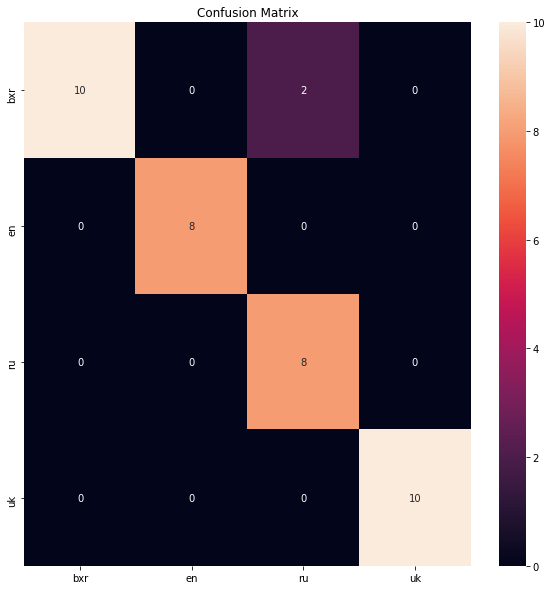

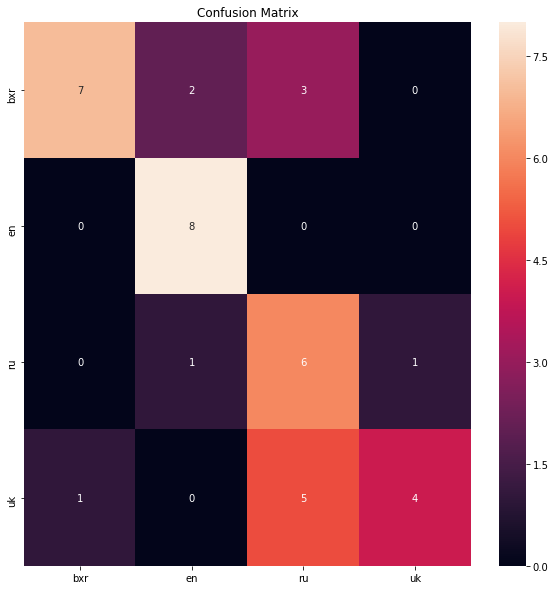

In [33]:
# найдите нужный код, не вставляйте лишний (!)
from sklearn import feature_extraction

vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 5), analyzer='char')
vectorizer.fit(wiki_texts['ru'])
for item in vectorizer.get_feature_names()[:100]:
    print(item)
    
# print(vectorizer.transform(wiki_texts['ru'])[0])  # первый документ в векторном представлении

from sklearn import pipeline
from sklearn import naive_bayes
import numpy as np

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import pipeline
from sklearn import naive_bayes
import numpy as np

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

clf = pipeline.Pipeline([
    ('vctr', feature_extraction.text.TfidfVectorizer(ngram_range=(1, 2), analyzer='char')),
    ('clf', naive_bayes.MultinomialNB())])

all_texts = []
lang_indices = []
for lang in wiki_texts:
    all_texts.extend(wiki_texts[lang])
    lang_indices.extend([lang]*len(wiki_texts[lang]))
    
clf.fit(np.array(all_texts), np.array(lang_indices))

clf.predict(all_texts)

clf.predict(get_texts_for_lang('be'))

from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(all_texts,
                                                    lang_indices,
                                                    test_size=0.2,
                                                    random_state=0)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_predicted)


# Нарисуем confusion matrix и оценим качество
def test_classify(y_test, y_predicted, label_names):
    cm = metrics.confusion_matrix(y_test, y_predicted)
    
    plt.figure(figsize=(10, 10))
    plt.ylim(10.5, -0.5)
    sns.heatmap(cm, annot=True,  fmt='', xticklabels=label_names, yticklabels=label_names)
    plt.title('Confusion Matrix')
    
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=label_names))
    
test_classify(y_test, y_predicted, clf.classes_)

# Проверим на случайных отрывках из тестовых текстов
import random

small_texts = []
for text in X_test:
    begin = random.randint(0, len(text) - 10)
    small_texts.append(text[begin:begin+10])
y_predicted_small = clf.predict(small_texts)
test_classify(y_test, y_predicted_small, clf.classes_)

# Определение языка

Определите язык каждого комментария в каждом паблике с помощью определялки на частотах слов и покажите доли языков среди комментариев для каждого паблика.

In [35]:
lang_detects_freqs = {}

TEST_LANGS = ('kk', 'ru', 'uk', 'be', 'fr', 'en', 'bxr')

comment_texts = {}

f = []
f.extend(f1)
f.extend(f2)
f.extend(f3)
f.extend(f4)
f.extend(f5)
f.extend(f6)

ids = [-111587102,-129440544,-131348832,-5164516,-66347916,-95189895]

#print(corrp)


def collect_freqlist(massive, max_len=100):
    freqlist = Counter()
    # не забудем про токенизацию - nltk.word_tokenize
    for text in massive:
        for word in nltk.word_tokenize(text.lower()):
            if word.isalpha():
                freqlist[word] += 1
    dictor = dict(freqlist.most_common(max_len))
    return dictor


#collect_freqlist(corrp)

#collect_freqlist(corrp['ru'])




#from collections import Counter  # нужно объяснять, что это?

#import nltk
#import wikipedia

#nltk.download("punkt")


# найдите нужный код, не вставляйте лишний (!)
def get_texts_for_lang(lang, liss):
    wiki_content = []
    wikipedia.set_lang(lang)
    #pages = wikipedia.random(n)
    for page_name in corrp:
        try:
            page = wikipedia.page(page_name)
            wiki_content.append("%s" % (page_name))
        except wikipedia.exceptions.WikipediaException:
            #print("Skip %s" % page_name)
            pass
    return wiki_content


wiki_texts = {}
for lang in langs:
    wiki_texts[lang] = get_texts_for_lang(lang, 50)
    print(lang, len(wiki_texts[lang]))


# ваш код

ru 2
en 6
bxr 1
uk 2


In [36]:
# найдите нужный код, не вставляйте лишний (!)
def collect_freqlist(wiki_pages, max_len=100):
    freqlist = Counter()
    # не забудем про токенизацию - nltk.word_tokenize
    for text in wiki_pages:
        for word in nltk.word_tokenize(text.lower()):
            if word.isalpha():
                freqlist[word] += 1
    return dict(freqlist.most_common(max_len))

# проверка
for lang in TEST_LANGS:
    try:
        try:
            print(collect_freqlist(wiki_texts[lang]))
        except KeyError:
            pass
    except VolumeError:
        break

{'that': 2, 'does': 1, 'mean': 1}
{'і': 1, 'я': 1, 'хооо': 1}
{'you': 3, 'that': 2, 'really': 2, 'and': 2, 'does': 1, 'mean': 1, 'no': 1, 'can': 1, 'solve': 1, 'your': 1, 'problems': 1, 'if': 1, 'start': 1, 'thinking': 1, 'about': 1, 'what': 1, 'need': 1, 'want': 1, 'how': 1, 'things': 1, 'work': 1, 'mister': 1, 'trash': 1, 'the': 1, 'white': 1, 'heavy': 1, 'duty': 1, 'ford': 1, 'ah': 1, 'a': 1, 'shrek': 1, 'reference': 1, 'very': 1, 'good': 1, 'picked': 1, 'where': 1}
{'that': 2, 'does': 1, 'mean': 1}


In [37]:
freq_lists = {}
for lang in langs:
    freq_lists[lang] = collect_freqlist(wiki_texts[lang])

In [38]:
def simple_lang_detect(freq_lists, text):
    counts = Counter()
    for lang, freq_list in freq_lists.items():
        freq_list = Counter(freq_list)
        for word in nltk.word_tokenize(text):
            counts[lang] += int(freq_list[word] > 0)
    return counts.most_common()

test_texts = get_texts_for_lang('en',corrp)
print(test_texts)

simple_lang_detect(freq_lists, str(test_texts))

['THAT DOES THAT MEAN', 'No, you can solve your problems if you start thinking about what you really need and want and how things really work', '-Exactly, mister trash truck.-approved the white heavy duty Ford F550.', 'Ah, a Shrek reference. Very good.', 'picked where?', '*fanatic_comments*']


[('en', 31), ('ru', 0), ('bxr', 0), ('uk', 0)]

Сделайте то же самое для определителя на символьных энграммах.

In [39]:
from sklearn import feature_extraction

TEST_LANGS = ('kk', 'ru', 'uk', 'be', 'fr', 'en', 'bxr')


vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 5), analyzer='char')
for lang in TEST_LANGS:
    try:
        try:
            vectorizer.fit(wiki_texts[lang])
            for item in vectorizer.get_feature_names()[:100]:
                print(item)
        except KeyError:
            pass
    except ValueError:
        break


 
 d
 do
 doe
 does
 m
 me
 mea
 mean
 t
 th
 tha
 that
*
*f
*fa
*fan
*fana
_
_c
_co
_com
_comm
a
an
ana
anat
anati
at
at 
at d
at do
at m
at me
ati
atic
atic_
c
c_
c_c
c_co
c_com
co
com
comm
comme
d
do
doe
does
does 
e
ea
ean
en
ent
ents
ents*
es
es 
es t
es th
f
fa
fan
fana
fanat
h
ha
hat
hat 
hat d
hat m
i
ic
ic_
ic_c
ic_co
m
me
mea
mean
men
ment
ments
mm
mme
mmen
mment
n
na
nat
nati
natic
nt
nts
nts*
o
oe
oes
 
 :
 :)
 х
 хо
 хоо
 хооо
 я
 я 
 я х
 я хо
)
*
*f
*fa
*fan
*fana
:
:)
_
_c
_co
_com
_comm
a
an
ana
anat
anati
at
ati
atic
atic_
c
c_
c_c
c_co
c_com
co
com
comm
comme
e
en
ent
ents
ents*
f
fa
fan
fana
fanat
i
ic
ic_
ic_c
ic_co
m
me
men
ment
ments
mm
mme
mmen
mment
n
na
nat
nati
natic
nt
nts
nts*
o
om
omm
omme
ommen
s
s*
t
ti
tic
tic_
tic_c
ts
ts*
о
о 
о :
о :)
оо
оо 
оо :
оо :)
ооо
ооо 
ооо :
х
 
 a
 a 
 a s
 a sh
 ab
 abo
 abou
 an
 and
 and 
 c
 ca
 can
 can 
 d
 do
 doe
 does
 du
 dut
 duty
 f
 f5
 f55
 f550
 fo
 for
 ford
 g
 go
 goo
 good
 h
 he
 hea
 heav
 ho
 how
 how 

In [40]:
for lang in TEST_LANGS:
    try:
        try:
            print(vectorizer.transform(wiki_texts[lang])[0])  # первый документ в векторном представлении
        except KeyError:
            pass
    except ValueError:
        break


  (0, 65)	0.173421993904824
  (0, 64)	0.173421993904824
  (0, 63)	0.173421993904824
  (0, 62)	0.173421993904824
  (0, 61)	0.086710996952412
  (0, 60)	0.086710996952412
  (0, 59)	0.086710996952412
  (0, 58)	0.086710996952412
  (0, 57)	0.086710996952412
  (0, 56)	0.086710996952412
  (0, 55)	0.173421993904824
  (0, 54)	0.346843987809648
  (0, 53)	0.086710996952412
  (0, 52)	0.086710996952412
  (0, 51)	0.086710996952412
  (0, 50)	0.086710996952412
  (0, 49)	0.086710996952412
  (0, 48)	0.086710996952412
  (0, 47)	0.086710996952412
  (0, 46)	0.086710996952412
  (0, 45)	0.086710996952412
  (0, 44)	0.086710996952412
  (0, 43)	0.086710996952412
  (0, 42)	0.086710996952412
  (0, 41)	0.086710996952412
  :	:
  (0, 24)	0.086710996952412
  (0, 23)	0.086710996952412
  (0, 22)	0.086710996952412
  (0, 21)	0.086710996952412
  (0, 20)	0.086710996952412
  (0, 19)	0.086710996952412
  (0, 18)	0.086710996952412
  (0, 17)	0.086710996952412
  (0, 16)	0.173421993904824
  (0, 15)	0.173421993904824
  (0, 14)	0.08

In [41]:
!pip install matplotlib==3.0.3
!pip install seaborn

In [42]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Artyem\Anaconda-3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'clf', 'random', 'cm', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [43]:
clf = pipeline.Pipeline([
    ('vctr', feature_extraction.text.TfidfVectorizer(ngram_range=(1, 2), analyzer='char')),
    ('clf', naive_bayes.MultinomialNB())
])

In [44]:
all_texts = []
lang_indices = []
for lang in wiki_texts:
    all_texts.extend(wiki_texts[lang])
    lang_indices.extend([lang]*len(wiki_texts[lang]))

In [45]:
# Обучаем классификатор
clf.fit(np.array(all_texts), np.array(lang_indices))

Pipeline(memory=None,
         steps=[('vctr',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [46]:
# Предсказываем результаты для тех же текстов
clf.predict(all_texts)

array(['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en'],
      dtype='<U3')

In [47]:
#clf.predict(get_texts_for_lang('be',corrp))

In [48]:
# Поделим корпус на train и test
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(all_texts,
                                                    lang_indices,
                                                    test_size=0.2,
                                                    random_state=0)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_predicted)

In [49]:
print(y_predicted)
print(y_test)

['en' 'en' 'en']
['en', 'uk', 'en']


In [55]:
# Нарисуем confusion matrix и оценим качество
def test_classify(y_test, y_predicted, label_names):
    cm = metrics.confusion_matrix(y_test, y_predicted)
    
    plt.figure(figsize=(10, 10))
    plt.ylim(10.5, -0.5)
    sns.heatmap(cm, annot=True,  fmt='', xticklabels=label_names, yticklabels=label_names)
    plt.title('Confusion Matrix')
    
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=label_names))

ValueError: Number of classes, 2, does not match size of target_names, 4. Try specifying the labels parameter

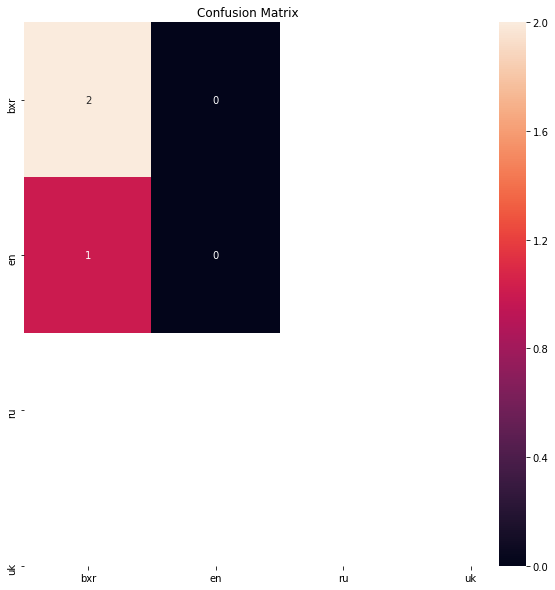

In [56]:
test_classify(y_test, y_predicted, clf.classes_)
# постоянно берутся новые переменные, поэтому могут возникнуть ошибки

Обсудите работу каждого из классификаторов, обсудите ошибки, объясните разницу в результатах.

Precision - точность исследования; macro avs - среднее макрозначение; weighted avg - взвешенное среднее значение; f1-score - f-значение, support - количество переменных, влияющие на результат, а recall - вероятность добавления переменной в список значений (наверное)